In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/nifty_500.csv')

In [ ]:
df.head()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

convert the objects (encode),handle (-) values

In [ ]:
percentage_columns = ["Change", "Percentage Change", "365 Day Percentage Change", "30 Day Percentage Change"]
for col in percentage_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('%', '', regex=True), errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     496 non-null    float64
 10  Percentage Change          498 non-null    float64
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

In [ ]:
for col in df.columns:
    if df[col].dtype == "object":  # Categorical columns
        df[col] = df[col].fillna(df[col].mode()[0])  # Fill with most frequent value
    else:  # Numerical columns
        df[col] = df[col].fillna(df[col].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    float64
 10  Percentage Change          501 non-null    float64
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

In [ ]:
if "Value (Indian Rupee)" in df.columns:
    df["Value (Indian Rupee)"] = df["Value (Indian Rupee)"].astype(float)

Spilitting the data before hand

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df['Symbol'].value_counts()

,count
Symbol,
3MINDIA,1
NMDC,1
PEL,1
PCBL,1
PAYTM,1
...,...
GMRINFRA,1
GMMPFAUDLR,1
GLS,1


In [ ]:
df['Company Name'].value_counts()

,count
Company Name,
3M India Ltd.,1
NMDC Ltd.,1
Piramal Enterprises Ltd.,1
PCBL Ltd.,1
One 97 Communications Ltd.,1
...,...
GMR Infrastructure Ltd.,1
GMM Pfaudler Ltd.,1
Glenmark Life Sciences Ltd.,1


In [ ]:
df['Series'].value_counts()

,count
Series,
EQ,500
BE,1


all those columns can be encoded using

1.   One hot Encoding for columns other than series
2.   Label Encoding for series



In [ ]:
X = df.drop(columns=["Last Traded Price", "Company Name", "Symbol"])
y = df["Last Traded Price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state = 10)

In [ ]:
X_train.head()

,Industry,Series,Open,High,Low,Previous Close,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
78,Financial Services,EQ,181.65,185.70,178.45,181.25,4.25,2.34,5768579,1.048958e+09,272.80,142.10,19.36,-11.59
167,Fast Moving Consumer Goods,EQ,757.05,785.00,750.55,757.55,25.40,3.35,743399,5.717407e+08,1138.00,660.05,-12.95,-1.23
107,Financial Services,EQ,3281.20,3398.00,3264.10,3286.70,-17.00,-0.52,42577,1.423481e+08,3863.55,2425.20,29.43,-3.52
176,Chemicals,EQ,131.30,131.80,127.10,132.00,-1.40,-1.06,1507206,1.945351e+08,198.80,98.10,14.09,-20.82
351,Chemicals,EQ,2099.95,2164.35,2082.80,2089.90,68.10,3.26,501109,1.067728e+09,2764.70,1988.55,-2.97,-6.93


In [ ]:
le_industry = LabelEncoder()
X_train['Industry'] = le_industry.fit_transform(X_train['Industry'])

if "Series" in df.columns:
    le_series = LabelEncoder()
    X_train['Series'] = le_series.fit_transform(X_train['Series'])

In [ ]:
le_industry = LabelEncoder()
X_test['Industry'] = le_industry.fit_transform(X_test['Industry'])

if "Series" in df.columns:
    le_series = LabelEncoder()
    X_test['Series'] = le_series.fit_transform(X_test['Series'])

In [ ]:
X_train.head()

,Industry,Series,Open,High,Low,Previous Close,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
78,9,1,181.65,185.70,178.45,181.25,4.25,2.34,5768579,1.048958e+09,272.80,142.10,19.36,-11.59
167,8,1,757.05,785.00,750.55,757.55,25.40,3.35,743399,5.717407e+08,1138.00,660.05,-12.95,-1.23
107,9,1,3281.20,3398.00,3264.10,3286.70,-17.00,-0.52,42577,1.423481e+08,3863.55,2425.20,29.43,-3.52
176,2,1,131.30,131.80,127.10,132.00,-1.40,-1.06,1507206,1.945351e+08,198.80,98.10,14.09,-20.82
351,2,1,2099.95,2164.35,2082.80,2089.90,68.10,3.26,501109,1.067728e+09,2764.70,1988.55,-2.97,-6.93


<Axes: >

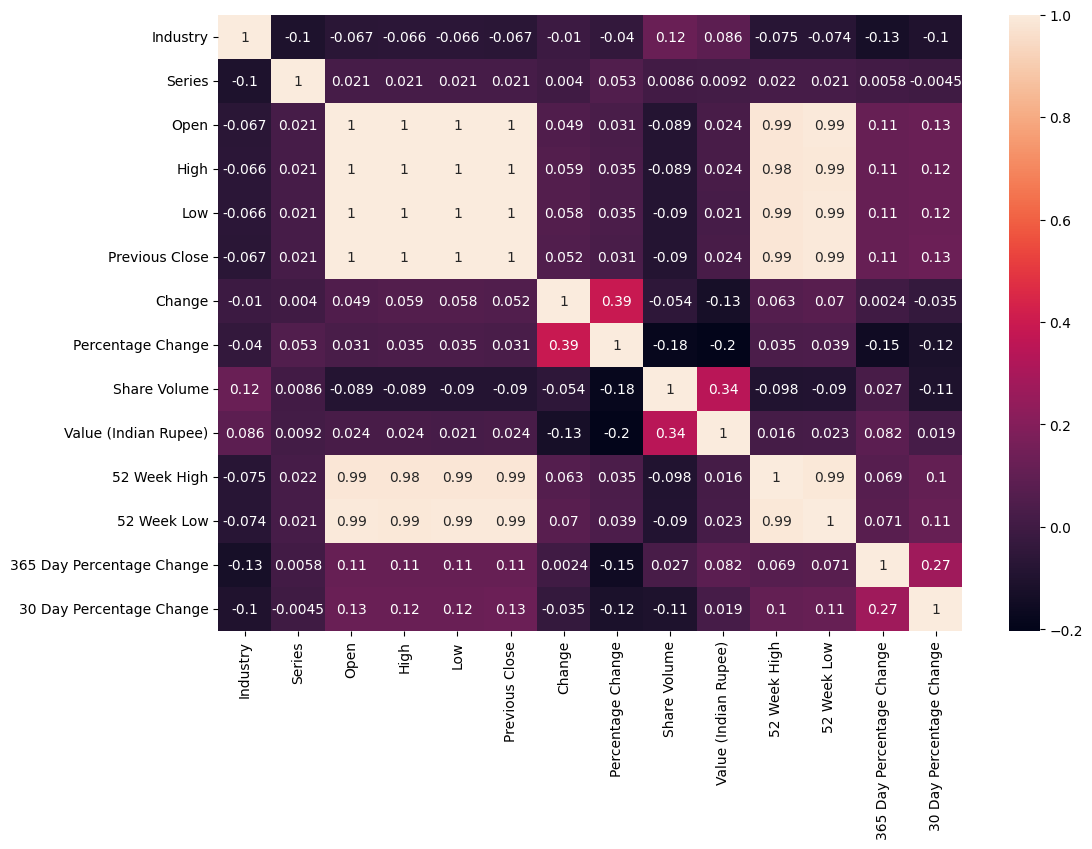

In [ ]:
plt.figure(figsize=(12,8))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [ ]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr


In [ ]:
correlation(X_train,0.95)

{'52 Week High', '52 Week Low', 'High', 'Low', 'Previous Close'}

In [ ]:
corr_features = correlation(X_train,0.75)

In [ ]:
corr_with_target = X_train.corrwith(y_train).sort_values(ascending=False)
print(corr_with_target)

High                         0.999949
Low                          0.999919
Previous Close               0.999798
Open                         0.999736
52 Week Low                  0.990385
52 Week High                 0.984728
30 Day Percentage Change     0.124106
365 Day Percentage Change    0.113038
Change                       0.067429
Percentage Change            0.038268
Value (Indian Rupee)         0.021750
Series                       0.020606
Industry                    -0.065318
Share Volume                -0.089845
dtype: float64


In [ ]:
X_train.drop(corr_features,axis =1 ,inplace=True)
X_test.drop(corr_features,axis =1 ,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training


In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
Root Mean Squared Error (RMSE): 121.28
R² Score: 0.9997


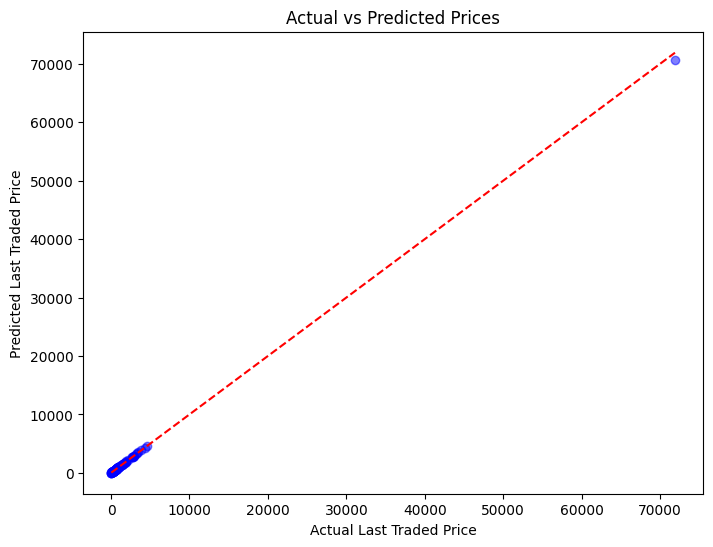

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Actual Last Traded Price")
plt.ylabel("Predicted Last Traded Price")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.show()